In [5]:
import pandas

In [7]:
bubble = pandas.read_csv("bubble_sort_results.csv")
selection = pandas.read_csv("selection_sort_results.csv")
insertion = pandas.read_csv("insertion_sort_results.csv")
merge = pandas.read_csv("merge_sort_results.csv")
quick = pandas.read_csv("quick_sort_results.csv")
heap = pandas.read_csv("heap_sort_results.csv")
cocktail = pandas.read_csv("cocktail_shaker_sort_results.csv")
comb = pandas.read_csv("comb_sort_results.csv")
library = pandas.read_csv("library_sort_results.csv")
tim = pandas.read_csv("tim_sort_results.csv")
intro = pandas.read_csv("intro_sort_results.csv")
tournament = pandas.read_csv("tournament_sort_results.csv")

In [8]:
bubble["Algorithm"] = "Bubble Sort"
selection["Algorithm"] = "Selection Sort"
insertion["Algorithm"] = "Insertion Sort" 
merge["Algorithm"] = "Merge Sort"
quick["Algorithm"] = "Quick Sort"
heap["Algorithm"] = "Heap Sort"
cocktail["Algorithm"] = "Cocktail Shaker Sort"
comb["Algorithm"] = "Comb Sort"
library["Algorithm"] = "Library Sort"
tim["Algorithm"] = "Tim Sort"
intro["Algorithm"] = "Intro Sort"
tournament["Algorithm"] = "Tournament Sort"

In [9]:
all = pandas.concat([bubble, selection, insertion, merge, quick, heap, cocktail, comb, library, tim, intro, tournament], ignore_index=True)

In [10]:
average_over_trials = all.groupby(["type", "size", "Algorithm"]).agg({
    "time_ms": "mean",
    "copy_count": "mean",
    "memory_kb": "mean"
})

In [11]:
average_over_trials['memory_kb'] = average_over_trials['memory_kb'].astype(int)
average_over_trials['copy_count']= average_over_trials['copy_count'].astype(int)

In [12]:
average_over_trials = average_over_trials.reset_index()

In [13]:
type_mapping = {
    1: "Sorted (Ascending)",
    2: "Sorted (Descending)",
    3: "Random",
    4: "50% Sorted",
    5: "99% Sorted",
    6: "Zigzag"
}
average_over_trials['type'] = average_over_trials['type'].map(type_mapping)

In [14]:
average_over_trials.to_csv("average_over_trials.csv", index=True)

/tmp/ipykernel_938/2536999196.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20')


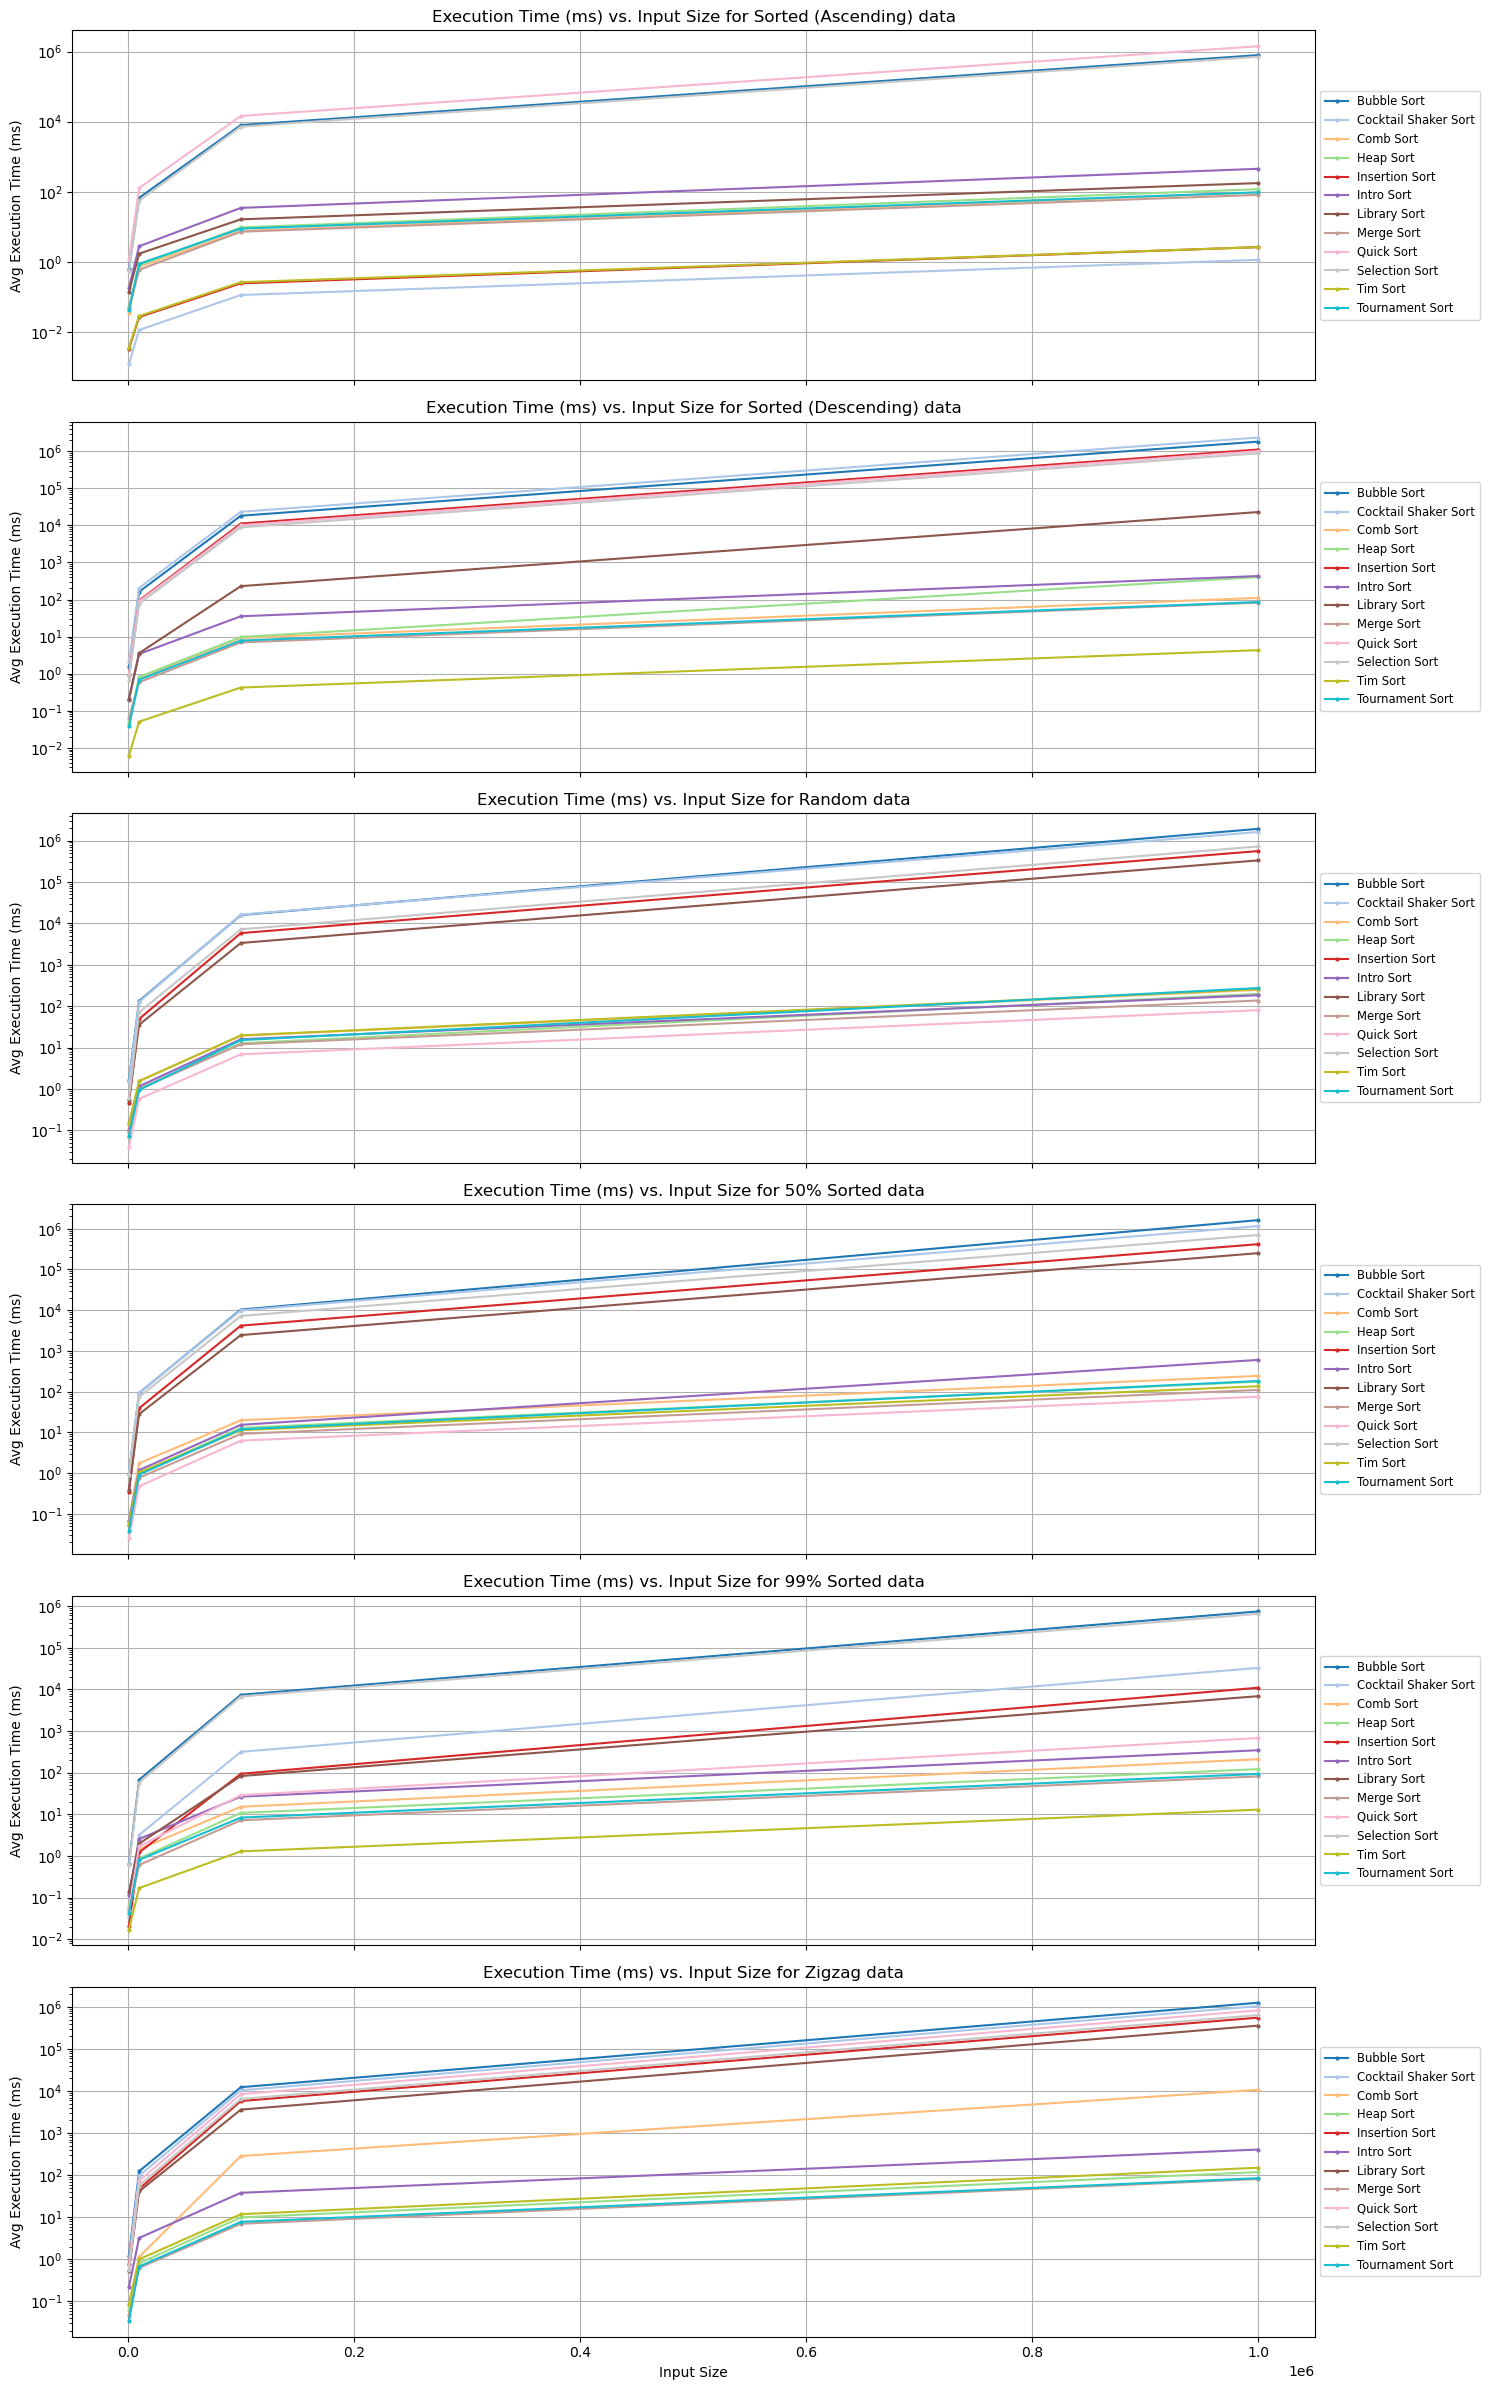

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('average_over_trials.csv')

data_types = df['type'].unique()
n_types = len(data_types)

cmap = plt.cm.get_cmap('tab20')

fig, axes = plt.subplots(n_types, 1, figsize=(15, 4*n_types), sharex=True)

for ax, dtype in zip(axes, data_types):
    subset_dtype = df[df['type'] == dtype]
    summary = subset_dtype.groupby(['Algorithm', 'size'])['time_ms'].mean().reset_index()
    
    alg_list = summary['Algorithm'].unique()
    
    for i, alg in enumerate(alg_list):
        subset_alg = summary[summary['Algorithm'] == alg]
        color = cmap(i / len(alg_list))
        ax.plot(subset_alg['size'], subset_alg['time_ms'], 
                marker='o', label=alg, color=color, markersize=2)
    
    ax.set_title(f'Execution Time (ms) vs. Input Size for {dtype} data')
    ax.set_ylabel('Avg Execution Time (ms)')
    ax.set_yscale('log')
    ax.grid(True)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

plt.xlabel('Input Size')
plt.tight_layout()
plt.savefig('time.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()


/tmp/ipykernel_938/1231638577.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20')


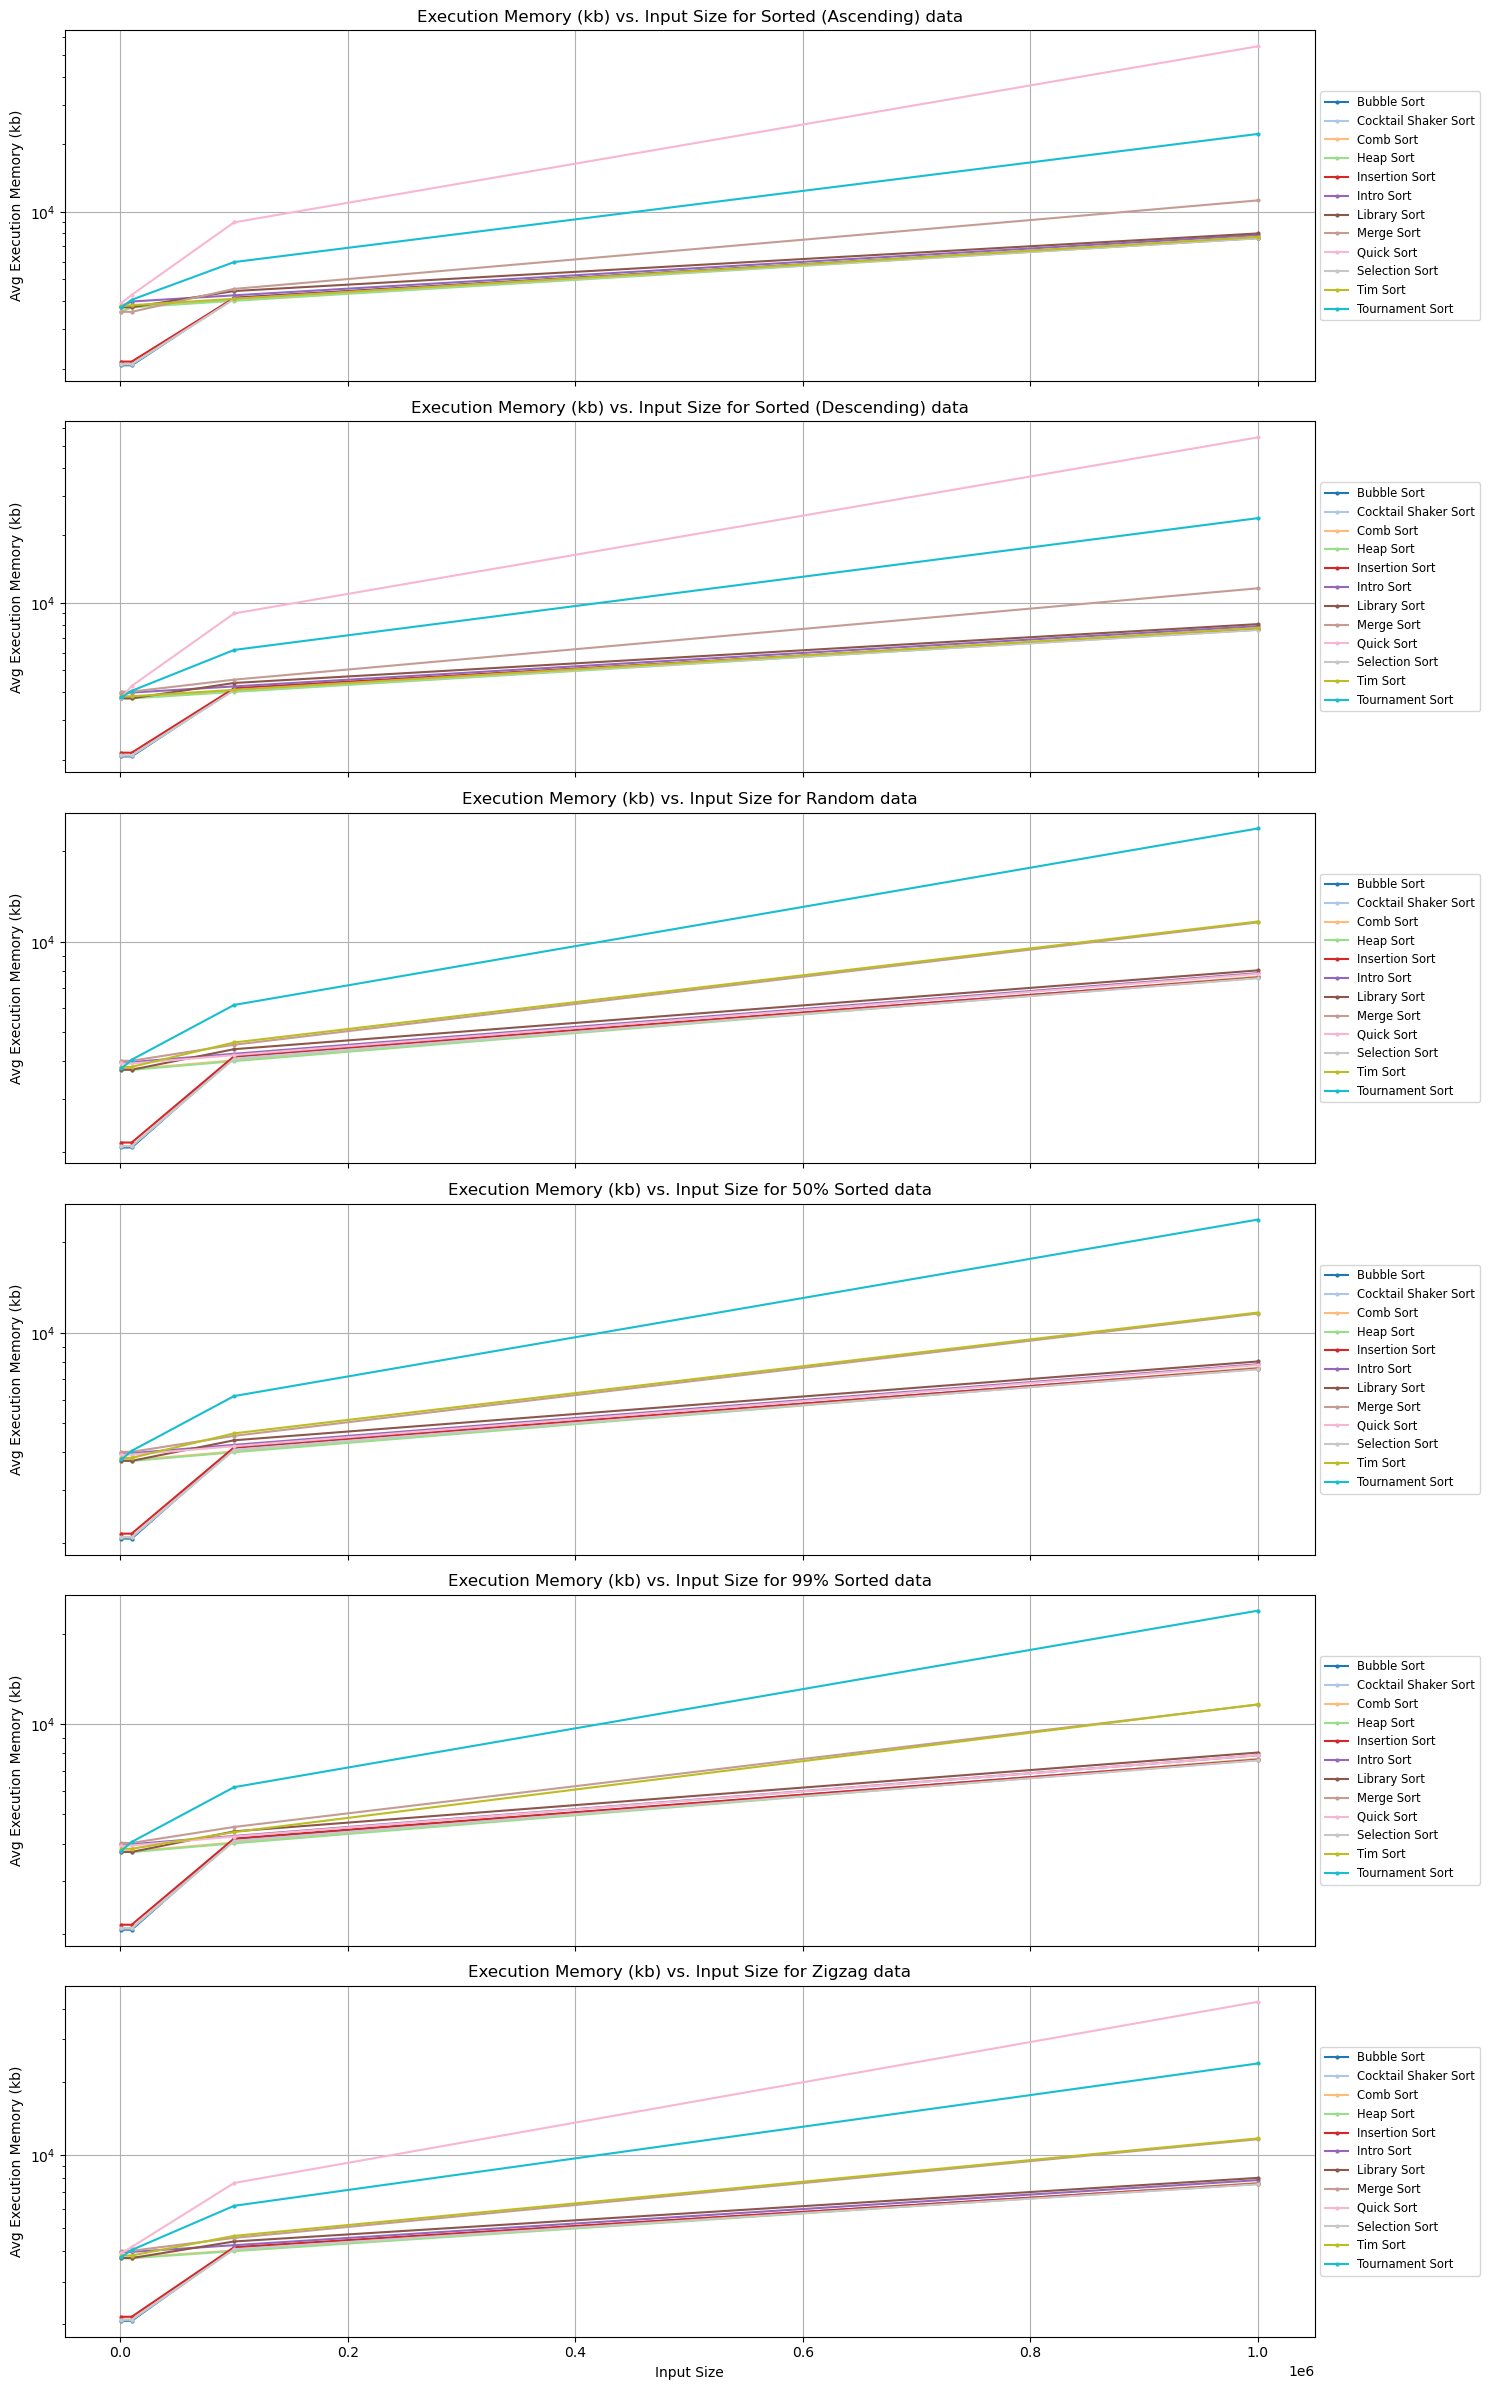

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('average_over_trials.csv')

data_types = df['type'].unique()
n_types = len(data_types)

cmap = plt.cm.get_cmap('tab20')

fig, axes = plt.subplots(n_types, 1, figsize=(15, 4*n_types), sharex=True)

for ax, dtype in zip(axes, data_types):
    subset_dtype = df[df['type'] == dtype]
    summary = subset_dtype.groupby(['Algorithm', 'size'])['memory_kb'].mean().reset_index()
    
    alg_list = summary['Algorithm'].unique()
    
    for i, alg in enumerate(alg_list):
        subset_alg = summary[summary['Algorithm'] == alg]
        color = cmap(i / len(alg_list))
        ax.plot(subset_alg['size'], subset_alg['memory_kb'], 
                marker='o', label=alg, color=color, markersize=2)
    
    ax.set_title(f'Execution Memory (kb) vs. Input Size for {dtype} data')
    ax.set_ylabel('Avg Execution Memory (kb)')
    ax.grid(True)
    ax.set_yscale('log')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

plt.xlabel('Input Size')
plt.tight_layout()
plt.savefig('memory.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()


/tmp/ipykernel_938/2170985943.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20')


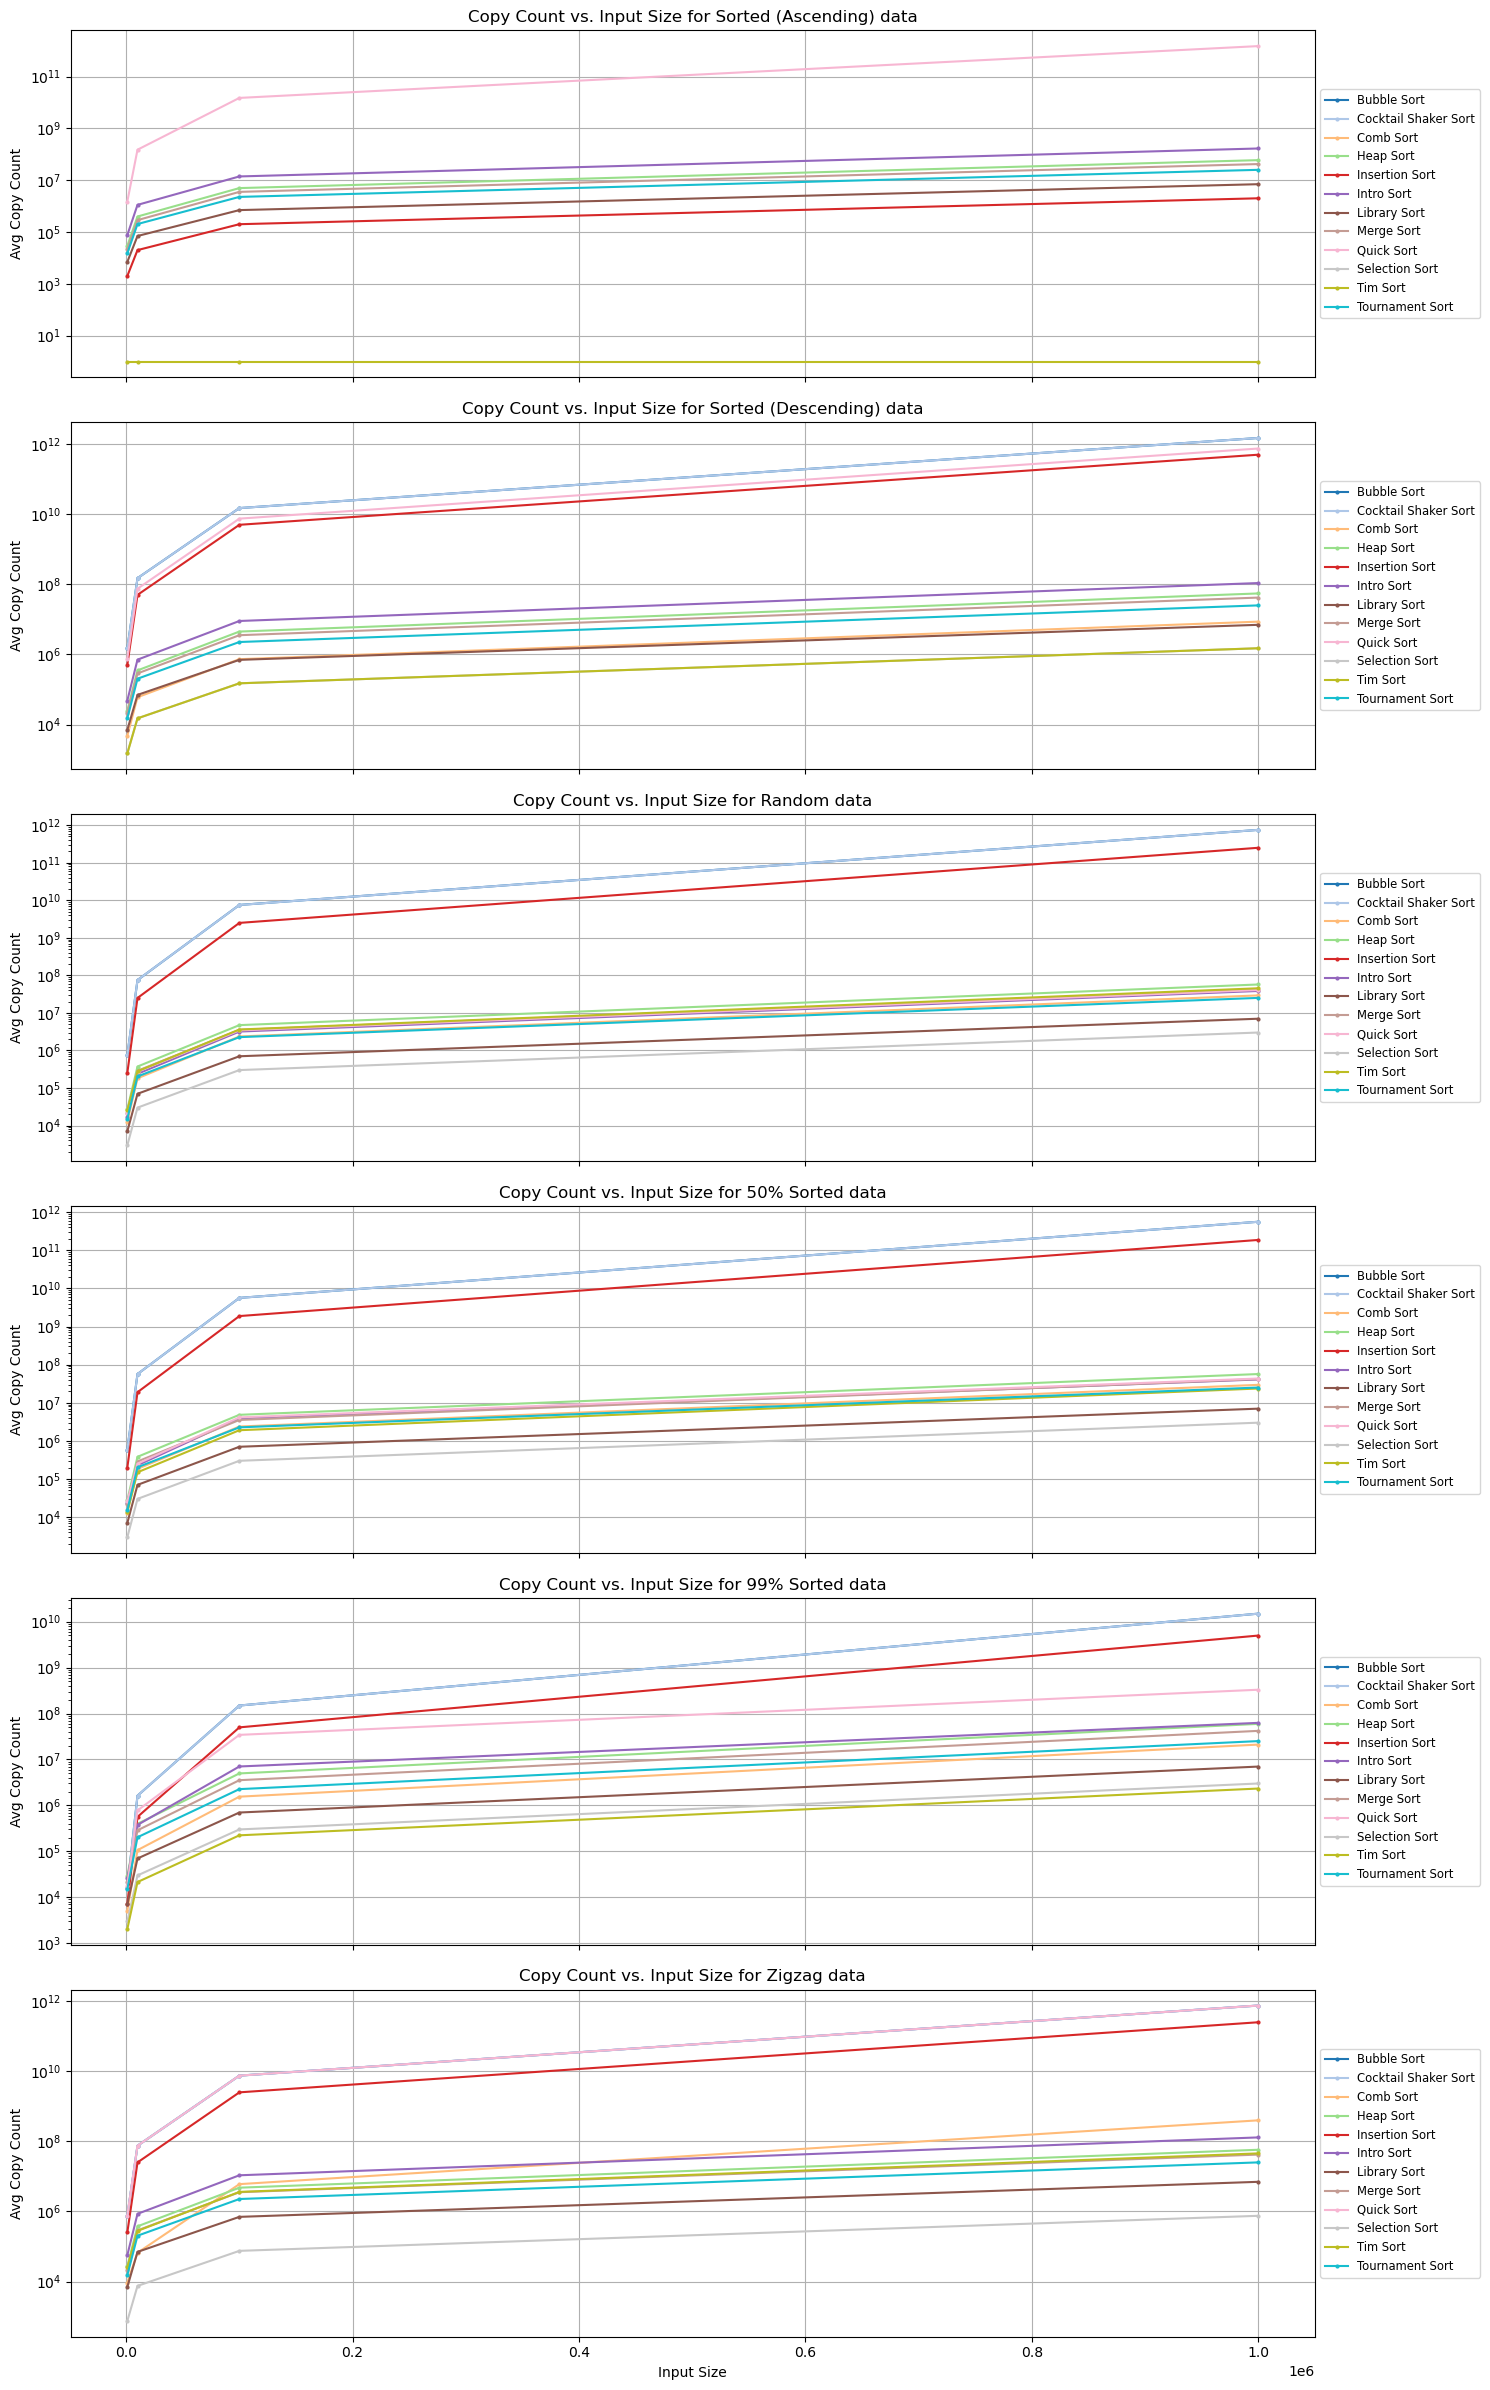

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('average_over_trials.csv')

data_types = df['type'].unique()
n_types = len(data_types)

cmap = plt.cm.get_cmap('tab20')

fig, axes = plt.subplots(n_types, 1, figsize=(15, 4*n_types), sharex=True)

for ax, dtype in zip(axes, data_types):
    subset_dtype = df[df['type'] == dtype]
    summary = subset_dtype.groupby(['Algorithm', 'size'])['copy_count'].mean().reset_index()
    
    alg_list = summary['Algorithm'].unique()
    
    for i, alg in enumerate(alg_list):
        subset_alg = summary[summary['Algorithm'] == alg]
        color = cmap(i / len(alg_list))
        ax.plot(subset_alg['size'], subset_alg['copy_count'], 
                marker='o', label=alg, color=color, markersize=2)
    
    ax.set_title(f'Copy Count vs. Input Size for {dtype} data')
    ax.set_ylabel('Avg Copy Count')
    ax.grid(True)
    ax.set_yscale('log')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

plt.xlabel('Input Size')
plt.tight_layout()
plt.savefig('copy_count.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

